In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
premium = pd.read_csv("E:/May 14(recall)/insurance.csv")

In [3]:
premium.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
premium.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
premium.shape

(1338, 7)

In [6]:
premium.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
premium['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
premium.drop('bmi', axis = 1, inplace = True)

In [9]:
premium.drop('smoker', axis = 1, inplace = True)

###### premium['sex'] = premium.sex.replace({'male':0, 'female':1})

In [10]:
premium.drop('sex', axis = 1, inplace = True)

###### premium['smoker'].value_counts()

###### premium['smoker'] = premium.smoker.replace({'yes':0, 'no':1})

###### premium['region'].value_counts()

In [11]:
premium.drop('region', axis = 1, inplace = True)

In [12]:
premium.drop('children', axis = 1, inplace = True)

###### from sklearn.preprocessing import LabelEncoder, OneHotEncoder
###### labelencoder = LabelEncoder()
###### X[:, 5] = labelencoder.fit_transform(X[:, 5])

###### onehotencoder = OneHotEncoder(categorical_features = [4])
###### X = onehotencoder.fit_transform(X).toarray()

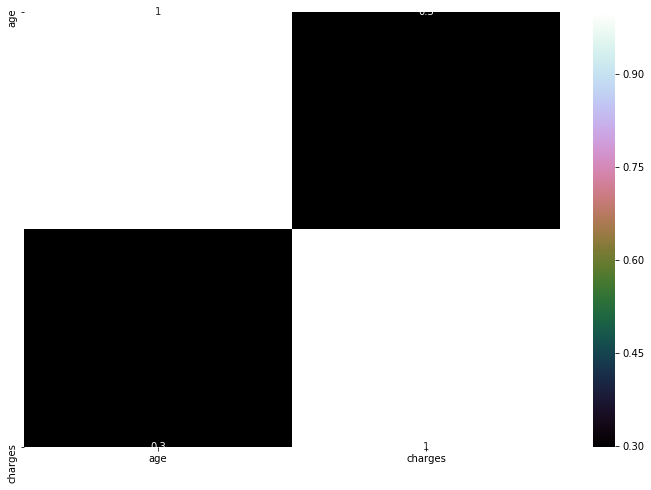

In [13]:
corrmat = premium.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
sns.heatmap(premium.corr(),cmap = 'cubehelix', annot=True)

In [14]:
premium.corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [15]:
X = premium[['age']]
Y = premium[['charges']]

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [17]:
# premium['bmi'] = scale.fit_transform(premium[['bmi']])
premium['charges'] = scale.fit_transform(premium[['charges']])

In [18]:
premium.head()

,age,charges
0,19,0.298584
1,18,-0.953689
2,28,-0.728675
3,33,0.719843
4,32,-0.776802


In [19]:
#X = featureextr

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model = model.fit(X_train, Y_train)

In [23]:
# xpred= my_model.predict(X_train)
# ypred=my_model.predict(X_test)
prediction = model.predict(X_test)

In [24]:
prediction

array([[14703.77387469],
       [12538.40483659],
       [19275.10851067],
       [14944.37043448],
       [ 8448.26332018],
       [12057.21171701],
       [ 8448.26332018],
       [19275.10851067],
       [10613.63235828],
       [15666.16011384],
       [11094.82547785],
       [13741.38763553],
       [10854.22891807],
       [14944.37043448],
       [18312.72227152],
       [15184.96699426],
       [15666.16011384],
       [15184.96699426],
       [14944.37043448],
       [14222.58075511],
       [ 9891.84267891],
       [14222.58075511],
       [ 8448.26332018],
       [ 9170.05299954],
       [15906.75667363],
       [16869.14291279],
       [18312.72227152],
       [10373.03579849],
       [15184.96699426],
       [ 8207.66676039],
       [13500.79107574],
       [17590.93259215],
       [ 8929.45643976],
       [11094.82547785],
       [10132.4392387 ],
       [14703.77387469],
       [ 8929.45643976],
       [14222.58075511],
       [16387.94979321],
       [12538.40483659],


In [25]:
Y_test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


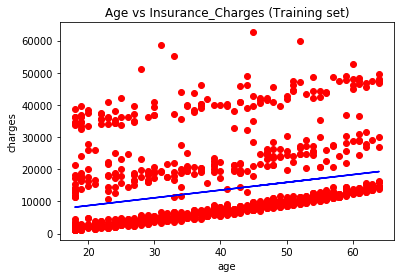

In [26]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Age vs Insurance_Charges (Training set)')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

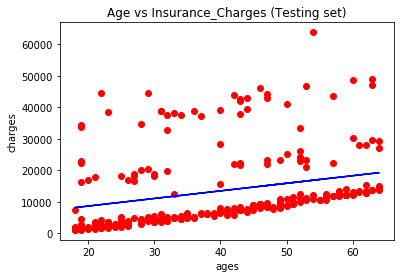

In [27]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Age vs Insurance_Charges (Testing set)')
plt.xlabel('ages')
plt.ylabel('charges')
plt.show()

In [28]:
model.score(prediction, Y_test)

-68408.02978822467

In [29]:
model.coef_

array([[240.59655979]])

In [30]:
model.intercept_

array([3876.92868419])

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Mean Absolute Error: 9173.258196746589
Mean Squared Error: 135983957.4805469
Root Mean Squared Error: 11661.21595205864


In [32]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm

In [33]:
regressor_OLS = sm.OLS(endog = Y_test, exog = prediction).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                              368.1
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    3.69e-52
Time:                        18:03:02   Log-Likelihood:                         -2889.8
No. Observations:                 268   AIC:                                      5782.
Df Residuals:                     267   BIC:                                      5785.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0077      0.053     19.186      0.000       0.904       1.111
==============================================================================
Omnibus:                       89.632   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.519
Skew:                           1.764   Prob(JB):                     3.83e-40
Kurtosis:                       4.950   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Reducing the error by using Polynomial Degree

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
linearmodel2 = LinearRegression()
linearmodel2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

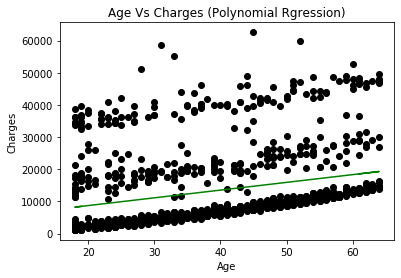

In [35]:
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X, model.predict(X), color = 'green')
plt.title('Age Vs Charges (Polynomial Rgression)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

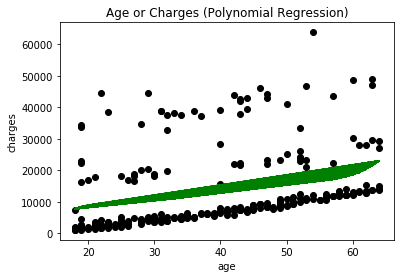

In [36]:
plt.scatter(X_test, Y_test, color = 'black')
plt.plot(X, linearmodel2.predict(poly_reg.fit_transform(X)), color = 'green')
plt.title('Age or Charges (Polynomial Regression)')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

pred = model.predict(X_test)

In [37]:
model.predict([[10]])

array([[6282.89428208]])

In [38]:
linearmodel2.predict(poly_reg.fit_transform([[10]]))

array([[-7680.25059122]])

###### from sklearn.metrics import mean_squared_error
###### mse = mean_squared_error(Y_test, prediction)

###### print('MSE:', mean_squared_error(Y_test, prediction))

###### Conclude: THis model is not prediction accurate output. Lower the RMSE better the model here the RMSE is high in this model.